# 프로젝트 :  얼굴에 고양이 수염 스티커 만들기

**import moduls :**
* 이미지 처리를 위한 cv2
* 얼굴 인식을 위한 dlib
* 행렬 연산을 위한 numpy
* 그래프 그리기 위한 matplotlib
* 파일 관리를 위한 os
* 주피터 노트북에 이미지 삽입 Image

**사용한 주요 변수들**
* sticker_img : 스티커 이미지
* my_img_rgb : RGB 상체 이미지
* my_img_show : 출력용 RGB 상체 이미지
* face_detector : 얼굴 검출 객체
* face_rects : 얼굴의 bounding box 좌표
* landmark_predictor : 얼굴 윤곽 객체
* list_landmarks : 얼굴 윤곽 포인트 목록
* img_sticker : 스티커 이미지
* face_roi : 스티커 부착할 영역

## Step 1. 필요한 모듈 import하기

In [1]:
import cv2
import dlib
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image  

## Step 2. 스티커 구하기 or 만들기
스티커를 만들거나 구해야합니다. PPT, 포토샵 등을 이용해서 직접 만드셔도 좋습니다.   
보다 간단한 방법은 픽토그램 아이콘을 이용하면 쉽게 만들 수 있습니다.  
(1) 고양이 수염 이미지를 다운로드 받아주세요. 

(2) 여러분의 셀카 이미지도 촬영해 주세요.

### Step 2-1. 고양이 수염 이미지

sticker : height x width = 512 x 512


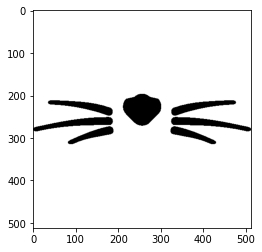

In [2]:
# 이미지 파일 경로
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'
# 원본 이미지
sticker_img = cv2.imread(sticker_path)
# 이미지 크기
sticker_height, stickert_width = sticker_img.shape[:2]
print('sticker : height x width =', sticker_height,'x', stickert_width) 
# 이미지 출력
plt.imshow(sticker_img)
plt.show()

### Step 2-2. 셀카 이미지_1

In [3]:
# 다중 이미지 출력 함수 정의
def display_multi_image(rows, cols, image1, image2, title1, title2):
    fig = plt.figure()
    rows, cols = rows, cols
    img1 = image1
    img2 = image2

    ax1 = fig.add_subplot(rows, cols, 1)
    ax1.imshow(img1)
    ax1.set_title(title1)
    ax1.axis('off')

    ax2 = fig.add_subplot(rows, cols, 2)
    ax2.imshow(img2)
    ax2.set_title(title2)
    ax2.axis('off')

    plt.show()

원본 이미지 크기 : height x width = 2208 x 2944
축소 이미지 크기 : height x width = 480 x 640


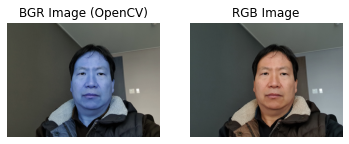

In [4]:
# 이미지 파일 경로
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/lyb2.jpg'
# 원본 이미지
my_img_bgr = cv2.imread(my_image_path)                 # OpenCV로 이미지를 읽어서
# 원본 이미지 크기
height, width = my_img_bgr.shape[:2]
print('원본 이미지 크기 : height x width =', height,'x', width)              # 2208 x 2944
# 이미지 축소
my_img_bgr = cv2.resize(my_img_bgr, (int(width/4.6), int(height/4.6)))   # (2208, 2944) --(4.6배 축소)--> (480, 640)의 크기 조절
# 축소 이미지 크기
height, width = my_img_bgr.shape[:2]
print('축소 이미지 크기 : height x width =', height,'x', width)              # 480 x 640
# 이미지 BGR --> RGB 변환
my_img_rgb = cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
my_img_show = my_img_rgb.copy()
  

# 이미지 출력
rows, cols = 1, 2
image1 = my_img_bgr
image2 = my_img_rgb
title1 = 'BGR Image (OpenCV)'
title2 = 'RGB Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

### OpneCV로 읽은 PNG 파일 색상 확인

#### <span style="color:blue">OpenCV와 PIL 모듈로 읽은 칼라 PNG 이미지 색상 비교 </span>

opencv_image_size : (400, 600)
pil_image_size : (600, 400)


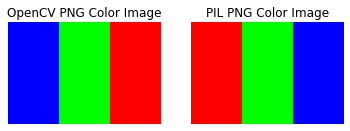

In [5]:
# 참고 : https://appia.tistory.com/366

# OpenCV 모듈 사용
color_png_cv = os.getenv('HOME')+'/aiffel/camera_sticker/images/color_png_flag.png'
color_png_cv = cv2.imread(color_png_cv)
cv_image_size = color_png_cv.shape[:2]
print('opencv_image_size :', cv_image_size)

# PIL 모듈 사용
color_png_pil = Image.open(os.getenv('HOME')+'/aiffel/camera_sticker/images/color_png_flag.png')
# color_png_pil = color_png.resize((300, 200))
pil_image_size = color_png_pil.size
print('pil_image_size :', pil_image_size)

# 이미지 출력
rows, cols = 1, 2
image1 = color_png_cv
image2 = color_png_pil
title1 = 'OpenCV PNG Color Image'
title2 = 'PIL PNG Color Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

#### <span style="color:blue">OpenCV와 PIL 모듈로 읽은 흑백 PNG 이미지</span>

opencv_image_size : (400, 600)
pil_image_size : (600, 400)


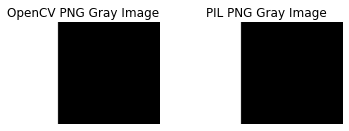

In [6]:
# OpenCV 모듈 사용
gray_png_cv = os.getenv('HOME')+'/aiffel/camera_sticker/images/gray_png_flag.png'
gray_png_cv = cv2.imread(gray_png_cv)
cv_image_size = gray_png_cv.shape[:2]
print('opencv_image_size :', cv_image_size)

# PIL 모듈 사용
gray_png_pil = Image.open(os.getenv('HOME')+'/aiffel/camera_sticker/images/gray_png_flag.png')
# color_png_pil = gray_png.resize((300, 200))
pil_image_size = gray_png_pil.size
print('pil_image_size :', pil_image_size)

# 이미지 출력
rows, cols = 1, 2
image1 = gray_png_cv
image2 = gray_png_pil
title1 = 'OpenCV PNG Gray Image'
title2 = 'PIL PNG Gray Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

##### 참고 : https://ponyozzang.tistory.com/596
*  <span style="color:red">OpenCV 사용하여 이미지 크기 확인</span>
  - 사이즈를 취득할 때 OpenCV를 사용하면 NumPy 배열 `ndarray`로 취득
  - ndarray 형태로 취득해 `shape`로 정보를 취득하는 경우에 이미지의 세로와 가로 사이즈를 취득
  - 이미지 크기는 `(height, width)` 형식으로 저장
  - 표현하는 색상의 순서가 **BGR** 형식
    
    
* <span style="color:red">Pillow(PIL) 사용하여 이미지 크기 확인</span>
  - Pillow(PIL)로 이미지 정보를 취득하면 `size 또는 width와 height`로 사이즈를 취득
  - size로 정보를 취득한 경우에는 튜플로 표시되기 때문에 가로와 세로 값을 따로 취득하기 위해서는 변수에 다시 저장
  - width와 height는 가로 사이즈와 세로 사이즈를 바로 출력
  - 이미지 크기는 `(width, height)` 형식으로 저장
  - 표현하는 색상의 순서가 **RGB** 형식

## Step 3. 얼굴 검출 & 랜드마크 검출 하기
오늘 배운 dlib을 이용해서 얼굴의 bounding box 위치와 landmark의 위치를 찾아주세요.

### Step 3-1. 얼굴의 bounding box 추출하기

In [7]:
# 얼굴 검출하는 face_detector 함수 호출
face_detector = dlib.get_frontal_face_detector()   

# 얼굴의 bounding box 추출
box_img = my_img_show.copy()
face_rects = face_detector(box_img, 1)   # 1 : Color로 읽어 들임, 0 : Grayscale로 읽어 들임, -1 : alpha channel까지 포함

# 찾은 얼굴영역 좌표
print('얼굴의 bounding box :', face_rects)

얼굴의 bounding box : rectangles[[(262, 160) (448, 345)]]


box width : 187
box height : 186
box width : 187
box height : 186
사각박스 포함된 이미지 크기 : (480, 640)


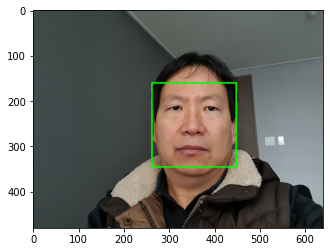

In [8]:
# bounding box와 이미지 겹쳐서 보기
for face_rect in face_rects:
    l = face_rect.left()    # 262
    t = face_rect.top()     # 160
    r = face_rect.right()   # 448
    b = face_rect.bottom()  # 345
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box

# 사각형 그리기 (참고 : https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)
my_img_rect = my_img_show.copy()
green_color = (0, 255, 0)
line_thickness = 2
# cv2.rectangle(img, start, end, color, thickness)
cv2.rectangle(my_img_rect, (l,t), (r,b), green_color, line_thickness, lineType=cv2.LINE_AA)  # LINE_AA : antialiased line

print('box width :', w)
print('box height :', h)
print('box width :', r - l + 1)
print('box height :', b - t + 1)
print('사각박스 포함된 이미지 크기 :', my_img_rect.shape[:2])

plt.imshow(my_img_rect)
plt.show()

### 3-2. face landmark 검출하기

68


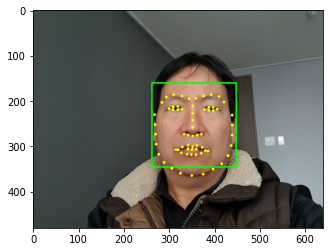

In [9]:
# 학습된 랜드마크 모델 데이터 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# 랜드마크 찾기 위한 shape_predictor 함수 호출
landmark_predictor = dlib.shape_predictor(model_path)

# face landmark points 찾기
list_landmarks = []
my_img_ldmk = my_img_rect.copy()
for face_rect in face_rects:
    # 랜드마크 추출 (참고 : https://blog.naver.com/chandong83/221487549771)
    points = landmark_predictor(my_img_ldmk, face_rect)
    # 랜드마크 좌표값 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크를 이미지와 겹쳐서 보기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # 랜드마크를 원으로 그리기 (참고 : https://deep-learning-study.tistory.com/105)
        center = point
        radius = 3
        color = (255, 255, 0)        # yellow color는 BGR 형태의 color
        line_thickness = -1          # line_thickness = -1은 원의 안쪽을 채움
        # cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)  
        cv2.circle(my_img_ldmk, point, radius, color, line_thickness)   # cv2.circle()함수 수행되면 이미지 데이터 업데이트됨

plt.imshow(my_img_ldmk)
plt.show()

(참고 : https://wikidocs.net/64, https://dojang.io/mod/page/view.php?id=2359)
* **람다 표현식** => `lambda 매개변수들 : 표현식`
* **map 함수** ==> `map(함수, 리스트)`
 - map 함수는 리스트에서 원소를 하나씩 꺼내서 함수를 적용시킨 결과를 새로운 리스트에 담아준다.
 - `list(map(lambda 매개변수들 : 표현식, 리스트))`

## Step 4. 스티커 적용 위치 확인하기
고양이 수염이 적용 될 볼 위치를 landmark를 사용해서 계산해 주세요.

### Step 4-1. 얼굴 위치 및 사각 테두리 위치

In [10]:
# 얼굴 위치 및 bounding box 위치
for face_rect, landmark in zip(face_rects, list_landmarks):
    # nose center index : 30
    print ('내 코의 중심점(x, y) :', landmark[30])                          
    
    # bounding box 원점 위치 = 내 코의 중심점
    x = landmark[30][0]
    y = landmark[30][1] 
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box
    
    # bounding box 시작점
    refined_x = x - w // 2      # left
    refined_y = y - h // 2      # top
    
print ('bounding box 원점 위치(x, y) : (%d,%d)' %(x, y))
print ('bounding box 크기(h, w) : (%d,%d)' %(h, w))
print ('bounding box 시작점(x,y) : (%d,%d)'%(refined_x, refined_y))

내 코의 중심점(x, y) : (352, 258)
bounding box 원점 위치(x, y) : (352,258)
bounding box 크기(h, w) : (186,187)
bounding box 시작점(x,y) : (259,165)


* **zip()은 여러 개의 iterable자료형이 개수가 동일할 때 사용한다.** 
* iterable 자료형의 **각각의 요소를 나눈 후 순서대로 묶어서** 요소 개수만큼 새로운 iterable 자료형을 생성한다.
* 여기에서 말하는 interable자료형은 리스트, 튜플 같이 반복 가능한 자료형을 의미한다. 
* 예) `name = ['a', 'b'], value = [1, 2]  -->  zip(name, value)  ==>  [('a', 1), ('b', 2)]`

(참고 : https://ooyoung.tistory.com/60)

### Step 4-2. 스티커 이미지 크기 조절
* 참고 : 
  - https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/
  - https://076923.github.io/posts/Python-opencv-8/
  - https://opencv-python.readthedocs.io/en/latest/doc/10.imageTransformation/imageTransformation.html
  - `cv2.resize(원본 이미지, 결과 이미지 크기(너비, 높이), 보간법)`
  - `cv2.resize(원본 이미지, dsize=(0, 0), 가로비, 세로비, 보간법)`

(187, 186, 3)
스티커 축소 이미지 크기 : height x width = 187 x 186


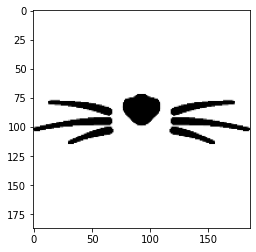

In [11]:
# 스티커 이미지 크기 변경
sticker_rsz = cv2.resize(sticker_img.copy(), (h, w))            # bounding box와 같은 크기로
print(sticker_rsz.shape)
# 축소 이미지 크기
sticker_height, sticker_width = sticker_rsz.shape[:2]
print('스티커 축소 이미지 크기 : height x width =', sticker_height,'x', sticker_width)  

plt.imshow(sticker_rsz)
plt.show()

<span style="color:red">cv2.resize(img, (h, w)) 함수로 크기를 조정할 때는 (height, width) 순서로 설정</span>

## Step 5. 스티커 적용하기
(1) 오늘 배운 np.where 를 사용해서 스티커를 적용해 주세요.

(2) 스티커를 조금 더 자연스럽게 보이게 하려면 어떻게 해야 할까요? 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 봅시다.  
[hint] opencv 의 cv2.addWeighted() 를 참고하세요.

### Step 5-1. 스티커 부착 위치
* 스티커 중심 위치는 사람 코의 중심 위치와 같음
    * $x = x_{nose}$
    * $y = y_{nose}$  
   
   
* 스티커의 크기는 얼굴 bounding box 크기와 같음  
 * $width = width_{bbox}$
 * $height = height_{bbox}$

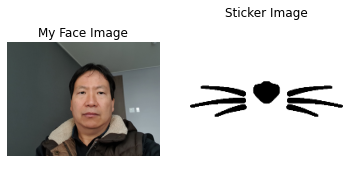

In [12]:
# 혼합할 이미지 출력
rows, cols = 1, 2
image1 = my_img_show
image2 = sticker_rsz
title1 = 'My Face Image'
title2 = 'Sticker Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

### Step 5-2. 스티커 부착 영역 (face_roi)

In [13]:
# 스티커 부착할 영역
print('left :', refined_x)
print('top  :', refined_y)
print('right  :', refined_x + sticker_rsz.shape[0])
print('bottom :', refined_y + sticker_rsz.shape[1])

left : 259
top  : 165
right  : 446
bottom : 351


스티커 적용할 크기 :  (187, 186)


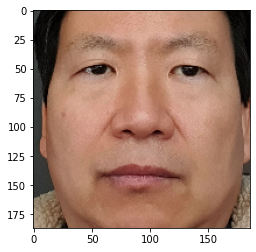

In [14]:
# 원본이미지에서 스티커를 적용할 위치 슬라이싱으로 처리
face_roi = my_img_show[refined_y : refined_y + sticker_rsz.shape[0],    # 행 영역
                       refined_x : refined_x + sticker_rsz.shape[1]]    # 열 영역
 
print('스티커 적용할 크기 : ', face_roi.shape[:2])

plt.imshow(face_roi)
plt.show()

In [15]:
# 교체 대상 영역 크기 비교
print(sticker_rsz.shape[:2])
print(face_roi.shape[:2])

(187, 186)
(187, 186)


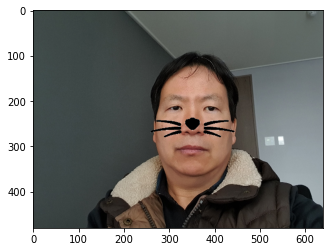

In [16]:
# img_sticker가 255 인 부분은 원본을 사용하고, 255가 아닌 부분은 스티커를 사용
my_img_show[refined_y:refined_y + sticker_rsz.shape[0], 
            refined_x:refined_x + sticker_rsz.shape[1]] = \
    np.where(sticker_rsz == 255, face_roi, sticker_rsz).astype(np.uint8)

plt.imshow(my_img_show)
plt.show()

* **np.where() 함수**
  - 넘파이에서 배열의 요소를 검색해 인덱스를 반환하는 함수 
  - `np.where()`는 **인덱스**뿐 아니라 검색 조건을 응용해 **True, False** 형태로도 사용 가능  
      
      
* **`np.where( 조건식, 조건식이 True일 경우 반환값, 조건식이 False일 경우 반환값 )`**

## Step 6. 문제점 찾아보기
(1) 셀프 카메라를 다양한 각도에서 촬영하면서 스티커를 반복해서 적용해 보세요.

(2) 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!

---

### Step 6-1 :  다른 각도의 셀프 카메라 이미지에 고양이 수염 스티커 적용 

#### Step 6-1-1. 셀카 이미지

원본 이미지 크기 : height x width = 2208 x 2944
축소 이미지 크기 : height x width = 480 x 640


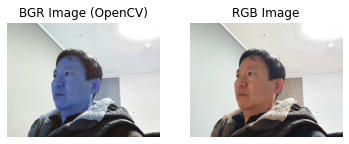

In [17]:
# 이미지 파일 경로
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/lyb3.jpg'
# 원본 이미지
my_img_bgr = cv2.imread(my_image_path)                 # OpenCV로 이미지를 읽어서
# 원본 이미지 크기
height, width = my_img_bgr.shape[:2]
print('원본 이미지 크기 : height x width =', height,'x', width)              # 2208 x 2944
# 이미지 축소
my_img_bgr = cv2.resize(my_img_bgr, (int(width/4.6), int(height/4.6)))   # (2208, 2944) --(4.6배 축소)--> (480, 640)의 크기 조절
# 축소 이미지 크기
height, width = my_img_bgr.shape[:2]
print('축소 이미지 크기 : height x width =', height,'x', width)              # 480 x 640
# 이미지 BGR --> RGB 변환
my_img_rgb = cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
my_img_show = my_img_rgb.copy()
  

# 이미지 출력
rows, cols = 1, 2
image1 = my_img_bgr
image2 = my_img_rgb
title1 = 'BGR Image (OpenCV)'
title2 = 'RGB Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

#### Step 6-1-2. 얼굴의 bounding box 추출하기

In [18]:
# 얼굴 검출하는 face_detector 함수 호출
face_detector = dlib.get_frontal_face_detector()   

# 얼굴의 bounding box 추출
box_img = my_img_show.copy()
face_rects = face_detector(box_img, 1)   # 1 : Color로 읽어 들임, 0 : Grayscale로 읽어 들임, -1 : alpha channel까지 포함

# 찾은 얼굴영역 좌표
print('얼굴의 bounding box :', face_rects)

얼굴의 bounding box : rectangles[[(139, 160) (324, 345)]]


box width : 186
box height : 186
box width : 186
box height : 186
사각박스 포함된 이미지 크기 : (480, 640)


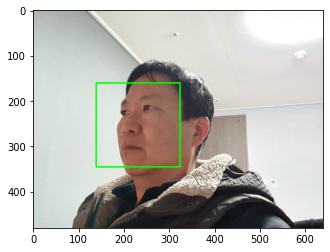

In [19]:
# bounding box와 이미지 겹쳐서 보기
for face_rect in face_rects:
    l = face_rect.left()    # 262
    t = face_rect.top()     # 160
    r = face_rect.right()   # 448
    b = face_rect.bottom()  # 345
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box

# 사각형 그리기 (참고 : https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)
my_img_rect = my_img_show.copy()
green_color = (0, 255, 0)
line_thickness = 2
# cv2.rectangle(img, start, end, color, thickness)
cv2.rectangle(my_img_rect, (l,t), (r,b), green_color, line_thickness, lineType=cv2.LINE_AA)  # LINE_AA : antialiased line

print('box width :', w)
print('box height :', h)
print('box width :', r - l + 1)
print('box height :', b - t + 1)
print('사각박스 포함된 이미지 크기 :', my_img_rect.shape[:2])

plt.imshow(my_img_rect)
plt.show()

#### 6-1-3. face landmark 검출하기

68


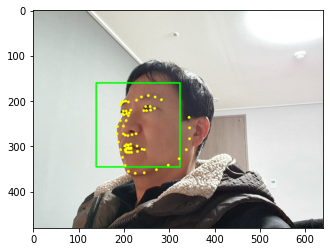

In [20]:
# 학습된 랜드마크 모델 데이터 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# 랜드마크 찾기 위한 shape_predictor 함수 호출
landmark_predictor = dlib.shape_predictor(model_path)

# face landmark points 찾기
list_landmarks = []
my_img_ldmk = my_img_rect.copy()
for face_rect in face_rects:
    # 랜드마크 추출 (참고 : https://blog.naver.com/chandong83/221487549771)
    points = landmark_predictor(my_img_ldmk, face_rect)
    # 랜드마크 좌표값 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크를 이미지와 겹쳐서 보기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # 랜드마크를 원으로 그리기 (참고 : https://deep-learning-study.tistory.com/105)
        center = point
        radius = 3
        color = (255, 255, 0)        # yellow color는 BGR 형태의 color
        line_thickness = -1          # line_thickness = -1은 원의 안쪽을 채움
        # cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)  
        cv2.circle(my_img_ldmk, point, radius, color, line_thickness)   # cv2.circle()함수 수행되면 이미지 데이터 업데이트됨

plt.imshow(my_img_ldmk)
plt.show()

#### Step 6-1-4. 얼굴 위치 및 사각 테두리 위치

In [21]:
# 얼굴 위치 및 bounding box 위치
for face_rect, landmark in zip(face_rects, list_landmarks):
    # nose center index : 30
    print ('내 코의 중심점(x, y) :', landmark[30])                          
    
    # bounding box 원점 위치 = 내 코의 중심점
    x = landmark[30][0]
    y = landmark[30][1] 
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box
    
    # bounding box 시작점
    refined_x = x - w // 2      # left
    refined_y = y - h // 2      # top
    
print ('bounding box 원점 위치(x, y) : (%d,%d)' %(x, y))
print ('bounding box 크기(h, w) : (%d,%d)' %(h, w))
print ('bounding box 시작점(x,y) : (%d,%d)'%(refined_x, refined_y))

내 코의 중심점(x, y) : (199, 255)
bounding box 원점 위치(x, y) : (199,255)
bounding box 크기(h, w) : (186,186)
bounding box 시작점(x,y) : (106,162)


(186, 186, 3)
스티커 축소 이미지 크기 : height x width = 186 x 186


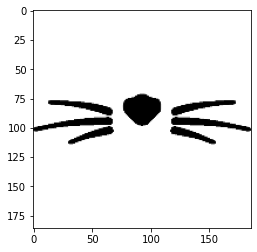

In [22]:
# 스티커 이미지 크기 변경
sticker_rsz = cv2.resize(sticker_img.copy(), (h, w))            # bounding box와 같은 크기로
print(sticker_rsz.shape)
# 축소 이미지 크기
sticker_height, sticker_width = sticker_rsz.shape[:2]
print('스티커 축소 이미지 크기 : height x width =', sticker_height,'x', sticker_width)  

plt.imshow(sticker_rsz)
plt.show()

#### Step 6-1-5. 스티커 부착 위치
* 스티커 중심 위치는 사람 코의 중심 위치와 같음
    * $x = x_{nose}$
    * $y = y_{nose}$  
   
   
* 스티커의 크기는 얼굴 bounding box 크기와 같음  
 * $width = width_{bbox}$
 * $height = height_{bbox}$

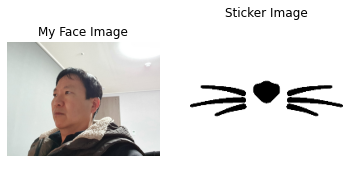

In [23]:
# 혼합할 이미지 출력
rows, cols = 1, 2
image1 = my_img_show
image2 = sticker_rsz
title1 = 'My Face Image'
title2 = 'Sticker Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

#### Step 6-1-6. 스티커 부착 영역 (face_roi)

In [24]:
# 스티커 부착할 영역
print('left :', refined_x)
print('top  :', refined_y)
print('right  :', refined_x + sticker_rsz.shape[0])
print('bottom :', refined_y + sticker_rsz.shape[1])

left : 106
top  : 162
right  : 292
bottom : 348


스티커 적용할 크기 :  (186, 186)


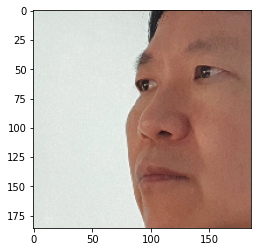

In [25]:
# 원본이미지에서 스티커를 적용할 위치 슬라이싱으로 처리
face_roi = my_img_show[refined_y : refined_y + sticker_rsz.shape[0],    # 행 영역
                       refined_x : refined_x + sticker_rsz.shape[1]]    # 열 영역
 
print('스티커 적용할 크기 : ', face_roi.shape[:2])

plt.imshow(face_roi)
plt.show()

In [26]:
# 교체 대상 영역 크기 비교
print(sticker_rsz.shape)
print(face_roi.shape)

(186, 186, 3)
(186, 186, 3)


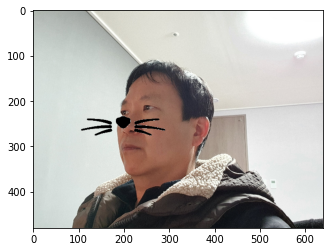

In [27]:
# img_sticker가 255 인 부분은 원본을 사용하고, 255가 아닌 부분은 스티커를 사용
my_img_show[refined_y:refined_y + sticker_rsz.shape[0], 
            refined_x:refined_x + sticker_rsz.shape[1]] = \
    np.where(sticker_rsz == 255, face_roi, sticker_rsz).astype(np.uint8)

plt.imshow(my_img_show)
plt.show()

### Step 6-2 :  다른 각도의 셀프 카메라 이미지에 고양이 수염 스티커 적용 

#### Step 6-2-1. 셀카 이미지

원본 이미지 크기 : height x width = 2944 x 2208
축소 이미지 크기 : height x width = 640 x 480


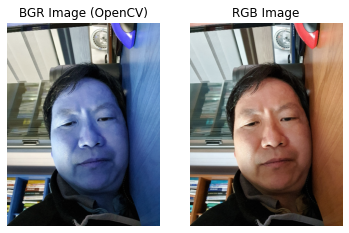

In [28]:
# 이미지 파일 경로
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/lyb8.jpg'
# 원본 이미지
my_img_bgr = cv2.imread(my_image_path)                 # OpenCV로 이미지를 읽어서
# 원본 이미지 크기
height, width = my_img_bgr.shape[:2]
print('원본 이미지 크기 : height x width =', height,'x', width)              # 2208 x 2944
# 이미지 축소
my_img_bgr = cv2.resize(my_img_bgr, (int(width/4.6), int(height/4.6)))   # (2208, 2944) --(4.6배 축소)--> (480, 640)의 크기 조절
# 축소 이미지 크기
height, width = my_img_bgr.shape[:2]
print('축소 이미지 크기 : height x width =', height,'x', width)              # 480 x 640
# 이미지 BGR --> RGB 변환
my_img_rgb = cv2.cvtColor(my_img_bgr, cv2.COLOR_BGR2RGB)
# 출력용 이미지 별도 보관
my_img_show = my_img_rgb.copy()
  

# 이미지 출력
rows, cols = 1, 2
image1 = my_img_bgr
image2 = my_img_rgb
title1 = 'BGR Image (OpenCV)'
title2 = 'RGB Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

#### Step 6-2-2. 얼굴의 bounding box 추출하기

In [29]:
# 얼굴 검출하는 face_detector 함수 호출
face_detector = dlib.get_frontal_face_detector()   

# 얼굴의 bounding box 추출
box_img = my_img_show.copy()
face_rects = face_detector(box_img, 1)   # 1 : Color로 읽어 들임, 0 : Grayscale로 읽어 들임, -1 : alpha channel까지 포함

# 찾은 얼굴영역 좌표
print('얼굴의 bounding box :', face_rects)

얼굴의 bounding box : rectangles[[(111, 231) (379, 498)]]


box width : 269
box height : 268
box width : 269
box height : 268
사각박스 포함된 이미지 크기 : (640, 480)


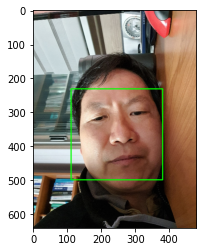

In [30]:
# bounding box와 이미지 겹쳐서 보기
for face_rect in face_rects:
    l = face_rect.left()    # 262
    t = face_rect.top()     # 160
    r = face_rect.right()   # 448
    b = face_rect.bottom()  # 345
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box

# 사각형 그리기 (참고 : https://opencv-python.readthedocs.io/en/latest/doc/03.drawShape/drawShape.html)
my_img_rect = my_img_show.copy()
green_color = (0, 255, 0)
line_thickness = 2
# cv2.rectangle(img, start, end, color, thickness)
cv2.rectangle(my_img_rect, (l,t), (r,b), green_color, line_thickness, lineType=cv2.LINE_AA)  # LINE_AA : antialiased line

print('box width :', w)
print('box height :', h)
print('box width :', r - l + 1)
print('box height :', b - t + 1)
print('사각박스 포함된 이미지 크기 :', my_img_rect.shape[:2])

plt.imshow(my_img_rect)
plt.show()

#### 6-2-3. face landmark 검출하기

68


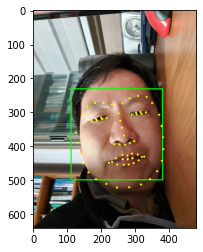

In [31]:
# 학습된 랜드마크 모델 데이터 불러오기
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
# 랜드마크 찾기 위한 shape_predictor 함수 호출
landmark_predictor = dlib.shape_predictor(model_path)

# face landmark points 찾기
list_landmarks = []
my_img_ldmk = my_img_rect.copy()
for face_rect in face_rects:
    # 랜드마크 추출 (참고 : https://blog.naver.com/chandong83/221487549771)
    points = landmark_predictor(my_img_ldmk, face_rect)
    # 랜드마크 좌표값 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
    list_landmarks.append(list_points)

print(len(list_landmarks[0]))

# 랜드마크를 이미지와 겹쳐서 보기 
for landmark in list_landmarks:
    for idx, point in enumerate(list_points):
        # 랜드마크를 원으로 그리기 (참고 : https://deep-learning-study.tistory.com/105)
        center = point
        radius = 3
        color = (255, 255, 0)        # yellow color는 BGR 형태의 color
        line_thickness = -1          # line_thickness = -1은 원의 안쪽을 채움
        # cv2.circle(img, center, radius, color, thickness=None, lineType=None, shift=None)  
        cv2.circle(my_img_ldmk, point, radius, color, line_thickness)   # cv2.circle()함수 수행되면 이미지 데이터 업데이트됨

plt.imshow(my_img_ldmk)
plt.show()

#### Step 6-2-4. 얼굴 위치 및 사각 테두리 위치

In [32]:
# 얼굴 위치 및 bounding box 위치
for face_rect, landmark in zip(face_rects, list_landmarks):
    # nose center index : 30
    print ('내 코의 중심점(x, y) :', landmark[30])                          
    
    # bounding box 원점 위치 = 내 코의 중심점
    x = landmark[30][0]
    y = landmark[30][1] 
    
    # bounding box 크기
    w = face_rect.width()       # width of bounding box
    h = face_rect.height()       # height of bounding box
    
    # bounding box 시작점
    refined_x = x - w // 2      # left
    refined_y = y - h // 2      # top
    
print ('bounding box 원점 위치(x, y) : (%d,%d)' %(x, y))
print ('bounding box 크기(h, w) : (%d,%d)' %(h, w))
print ('bounding box 시작점(x,y) : (%d,%d)'%(refined_x, refined_y))

내 코의 중심점(x, y) : (266, 368)
bounding box 원점 위치(x, y) : (266,368)
bounding box 크기(h, w) : (268,269)
bounding box 시작점(x,y) : (132,234)


(269, 268, 3)
스티커 축소 이미지 크기 : height x width = 269 x 268


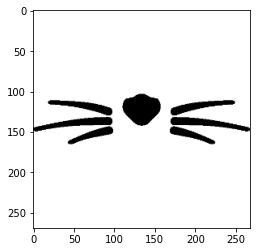

In [33]:
# 스티커 이미지 크기 변경
sticker_rsz = cv2.resize(sticker_img.copy(), (h, w))            # bounding box와 같은 크기로
print(sticker_rsz.shape)
# 축소 이미지 크기
sticker_height, sticker_width = sticker_rsz.shape[:2]
print('스티커 축소 이미지 크기 : height x width =', sticker_height,'x', sticker_width)  

plt.imshow(sticker_rsz)
plt.show()

#### Step 6-2-5. 스티커 부착 위치
* 스티커 중심 위치는 사람 코의 중심 위치와 같음
    * $x = x_{nose}$
    * $y = y_{nose}$  
   
   
* 스티커의 크기는 얼굴 bounding box 크기와 같음  
 * $width = width_{bbox}$
 * $height = height_{bbox}$

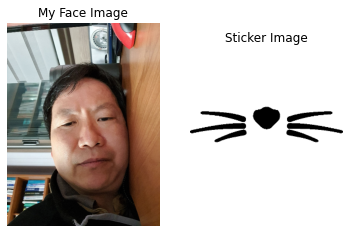

In [34]:
# 혼합할 이미지 출력
rows, cols = 1, 2
image1 = my_img_show
image2 = sticker_rsz
title1 = 'My Face Image'
title2 = 'Sticker Image'

display_multi_image(rows, cols, image1, image2, title1, title2)

#### Step 6-2-6. 스티커 부착 영역 (face_roi)

In [35]:
# 스티커 부착할 영역
print('left :', refined_x)
print('top  :', refined_y)
print('right  :', refined_x + sticker_rsz.shape[0])
print('bottom :', refined_y + sticker_rsz.shape[1])

left : 132
top  : 234
right  : 401
bottom : 502


스티커 적용할 크기 :  (269, 268)


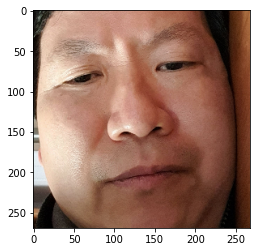

In [36]:
# 원본이미지에서 스티커를 적용할 위치 슬라이싱으로 처리
face_roi = my_img_show[refined_y : refined_y + sticker_rsz.shape[0],    # 행 영역
                       refined_x : refined_x + sticker_rsz.shape[1]]    # 열 영역
 
print('스티커 적용할 크기 : ', face_roi.shape[:2])

plt.imshow(face_roi)
plt.show()

In [37]:
# 교체 대상 영역 크기 비교
print(sticker_rsz.shape)
print(face_roi.shape)

(269, 268, 3)
(269, 268, 3)


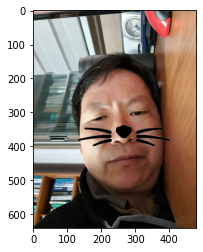

In [38]:
# img_sticker가 255 인 부분은 원본을 사용하고, 255가 아닌 부분은 스티커를 사용
my_img_show[refined_y:refined_y + sticker_rsz.shape[0], 
            refined_x:refined_x + sticker_rsz.shape[1]] = \
    np.where(sticker_rsz == 255, face_roi, sticker_rsz).astype(np.uint8)

plt.imshow(my_img_show)
plt.show()

### Step 6-2. 문제점이 무엇인지 최대한 자세하게 기록해 보세요. 
여러분이 생각한 문제점을 해결하기 위한 방법은 분명 존재합니다!
- 오늘 만든 스티커앱에서 생각해볼 수 있는 문제점은 다음과 같습니다.

  - 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
    - 얼굴의 각도와 동일하게 스티커 모양도 회전하는 것이 좋겠으나
    - dlib.get_frontal_face_detector() 함수는 정면 얼굴 검출기라서 기울어진 얼굴에 대해서는 검출하지 못한다.
  - 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요?
    - 멀리서 촬영하면 얼굴의 크기가 작게 되기 때문에 스티커의 크기도 작게 되어 잘 표현되지 않음
    - 옆으로 누워있으면 정면 검출기라서 인식을 하지 못하지만 90도 회전하면 정상적으로 검출된다.
  - 실행 속도가 중요할까요?
    - 동영상에서 구현 되려면 실행 속도가 중요함
  - 스티커앱을 만들 때 정확도가 얼마나 중요할까요?
    - 위치 정확도가 높을 수록 좋겠지만,
    - 위치가 잘못 되었다고 하여 큰 문제를 야기 하지는 않을 것으로 판단되어 중요도는 그리 높지 않다고 생각한다.

#### 문제점 및 해결 방법 :
* 1. OpenCV 와 PIL에서 칼라 이미지 표현 다름
  - OpenCV에서 칼라 이미지를 BGR 순서로 표현하고 저장함
  - PIL에서 칼라 이미지를 RGB 순서로 표현하고 저장함
  - `cv2.cvtColor(image, cv2.COLOR_BGR2RGB)` 함수를 이용하여 RGB로 변환
    
    
* 2. OpenCV 와 PIL의 이미지 크기 표현 다름
  - OpenCV에서 이미지 크기는 `image.shape[:2]` 하면 `(height, width)` 순서로 나타냄
  - PIL에서 이미지 크기는 `image.size` 하면 `(width, height)` 순서로 나타냄
    
    
* 3. 스티커 부착 위치 및 선택적 부착
  - 스티커 부착 위치는 얼굴 바운딩 박스로 찾은 영영과 일치시킴
  - 선택적 부착은 `np.where( 조건식, 조건식이 True일 경우 반환값, 조건식이 False일 경우 반환값 )` 함수를 이용하여 선택 적용함
    
    
* 4. 이미지 변환 후 업데이트 문제
  - `cv2.resize()`, `face_detector()`, `cv2.rectangle()`, `cv2.circle()` 함수들은 사용한 이미지를 업데이트 시킴
  - `image.copy()` 함수를 이용하여 입력 이미지를 복사하여 사용함
  

## 느낀점
* 이미지 processing이 사용하는 모듈에 따라서 차이가 있어 사용하는 것이 혼란 스러웠다.
* 딥러닝을 이미지 쪽으로 하려고 하기 때문에 이번 프로젝트는 재미있게 수행할 수 있었다.
* 사용할 변수들의 이름을 정하는 방법을 좀 더 배우는 것이 좋겠다.